In [1]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.banana2d import Banana2D



In [2]:
# initialize jax RNG
key = jr.PRNGKey(0)

### 2D Banana


In [3]:
# create an isotropic Gaussian
dist = Banana2D()

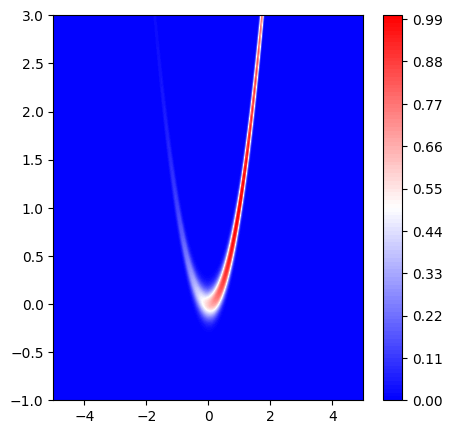

In [4]:
xmin, xmax = -5, 5
ymin, ymax = -1, 3
N_discr = 300
X, Y = np.meshgrid(np.linspace(xmin, xmax, N_discr), np.linspace(ymin, ymax, N_discr), indexing='ij')
X_flat = X.ravel()
Y_flat = Y.ravel()
Z_flat = dist.batch(jnp.array([X_flat, Y_flat]).T)
Z = Z_flat.reshape(X.shape)

# plot the logpdf
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, jnp.exp(Z), 100, cmap='bwr', origin='lower')
plt.colorbar()
plt.show()


(-1.0, 3.0)

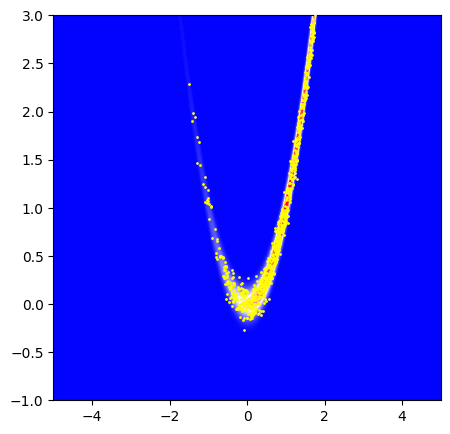

In [5]:
# sample from the distribution
n_samples = 1000
samples = dist.sample(key, n_samples)
# scatter plot of the samples
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, jnp.exp(Z), 100, cmap='bwr', origin='lower')
plt.scatter(samples[:, 0], samples[:, 1], s=1, color="yellow", zorder=10)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

In [6]:
# test batching
B = 10
x_batch = np.random.normal(0,1,size=(B,2))

In [7]:
dist.batch(x_batch)

Array([ -122.86603  ,  -612.50555  ,   -11.843191 ,   -26.252932 ,
        -956.918    ,   -22.68077  ,  -105.69051  ,   -31.058626 ,
          -2.4895582, -2199.8562   ], dtype=float32)

In [8]:
dist.grad_batch(x_batch)

Array([[  256.97882 ,   155.69902 ],
       [-1198.7644  ,   349.9292  ],
       [   45.765636,    46.37162 ],
       [ -135.61497 ,    72.45812 ],
       [ 2121.6204  ,   436.12866 ],
       [   14.287345,    66.44789 ],
       [ -164.13496 ,   145.32475 ],
       [ -203.30286 ,    78.76157 ],
       [   -8.999379,   -18.26789 ],
       [-2782.9229  ,   663.21246 ]], dtype=float32)